<img src="Archivos/miad4.png" width=900x>

 # TAREA 2

**Departamento de Ingeniería Industrial.**

**Maestría en Inteligencia Analítica para la Toma de Decisiones (Analytics).**

**Modelos de Análisis Estadístico (MIIA 4100) - 202320.**

Por ningún motivo se recibirán entregas posteriores a la hora límite. En caso de no realizar la entrega la nota asignada será 0.

Notas: La entrega del taller deberá hacerse en un informe autocontenido incluyendo las **gráficas,interpretación y conclusiones**. Adicionalmente debe entregarse el código utilizado dentro de este mismo notebook, de considerar necesario comentar todas las partes del codigo que crean necesarias para el entendimiento del codigo.

Para todos los literales que lo requieran, se recomienda utilizar una significancia del 5% (confianza del 95%). En caso de utilizar otro nivel de significancia, hacerlo explícito en el informe.

______________________________________________________________________



In [199]:
#Librerias que podria necesitar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


## Ejercicio 1
(35%) La base de datos contenida en diamantes.csv tiene información de los precios 53.940 diamantes teniendo en cuenta los carates, el corte, el color, la claridad, la profundidad, la longitud (x), el ancho (y) y la profundidad (z). <br>


a. (10%) Teniendo en cuenta los datos suministrados: ¿De qué variable o variables depende el valor de los diamantes?

- Para determinar las variables que influyen en el precio de los diamantes, es necesario comenzar con un enfoque hipotético. La hipótesis consiste en determinar si es posible predecir el valor de los diamantes mediante un modelo de regresión lineal múltiple. En primer lugar, se realiza un análisis de correlación para identificar las variables que presentan las relaciones más significativas con la variable del precio. Primero vamos a hacer una análisis descriptivo básico.



In [200]:
# Implementa tu respuesta en esta celda
#Cargamos la base de datos
df=pd.read_csv('Archivos/diamonds.csv')
df


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Tenemos un total de 53,940 observaciones y 10 columnas en nuestro conjunto de datos. A continuación, necesitamos identificar cuáles de estas columnas son de naturaleza categórica y cuáles son continuas, lo cual será fundamental para la planificación de nuestro análisis de regresión múltiple.


In [201]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

- El corte, el color y la claridad son ejemplos de variables categóricas en nuestros datos. Para las demás variables, queremos explorar cómo están distribuidos nuestros datos. Para ello, utilizamos la función describe().

In [202]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Para la variable "Carat," observamos que los valores oscilan en un rango de 0.2 a 5, con una variación estándar de 0.79. Además, el 75 por ciento de los datos se encuentra dentro de aproximadamente dos desviaciones estándar de la media.

En el caso de la variable "depth," notamos que presenta una variación estándar significativamente menor, lo que indica que los datos tienden a estar más agrupados alrededor de la media.

Por último, al examinar la variable "price," se destaca una gran variación estándar, lo que sugiere una amplia gama de valores en el precio de los diamantes, incluyendo algunos precios extremadamente altos.

C:\Users\David\AppData\Local\Temp\ipykernel_7212\1082744947.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matriz=df.corr()


<Axes: >

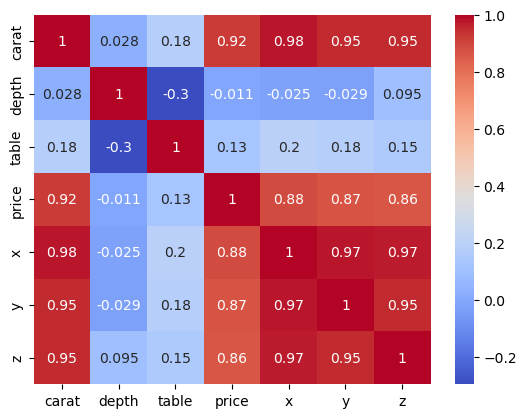

In [203]:
#
correlation_matriz=df.corr()
sns.heatmap(correlation_matriz, annot=True,cmap='coolwarm')

- Observamos varias correlaciones significativas entre las variables en nuestro conjunto de datos. Es evidente que la variable "carat" está altamente cocrrelacionada con las dimesnsiones "x","y" y "z", así como con el "precio". Del mismo modo, el "precio" muestra una fuerte correlación con "carat" y las dimensiones. Dado qeu estas tres dimensiones nos proporcionan información sobre las características físicas del diamante, es razonable considerar la creación de una nueva variable, como el "área" calculada como el producto de las dimensiones $área=x*y*z$. Luego, podemos explorar la matriz de correlación entre las variables, conservando esta nueva variable y eliminando dos de las dimensiones anteriores.



Luego vemos que si calculamos el area como $x*y*z$ y vemos que nuestra variable area va a ser una combinación lineal y así podemos bajar la dimensión de las variables.

C:\Users\David\AppData\Local\Temp\ipykernel_7212\3963591172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matriz=df.corr()


<Axes: >

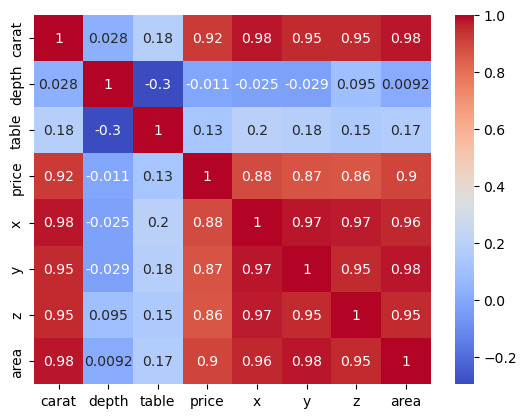

In [224]:
df['area']=df['x']*df['y']*df['z']
correlation_matriz=df.corr()
sns.heatmap(correlation_matriz, annot=True,cmap='coolwarm')

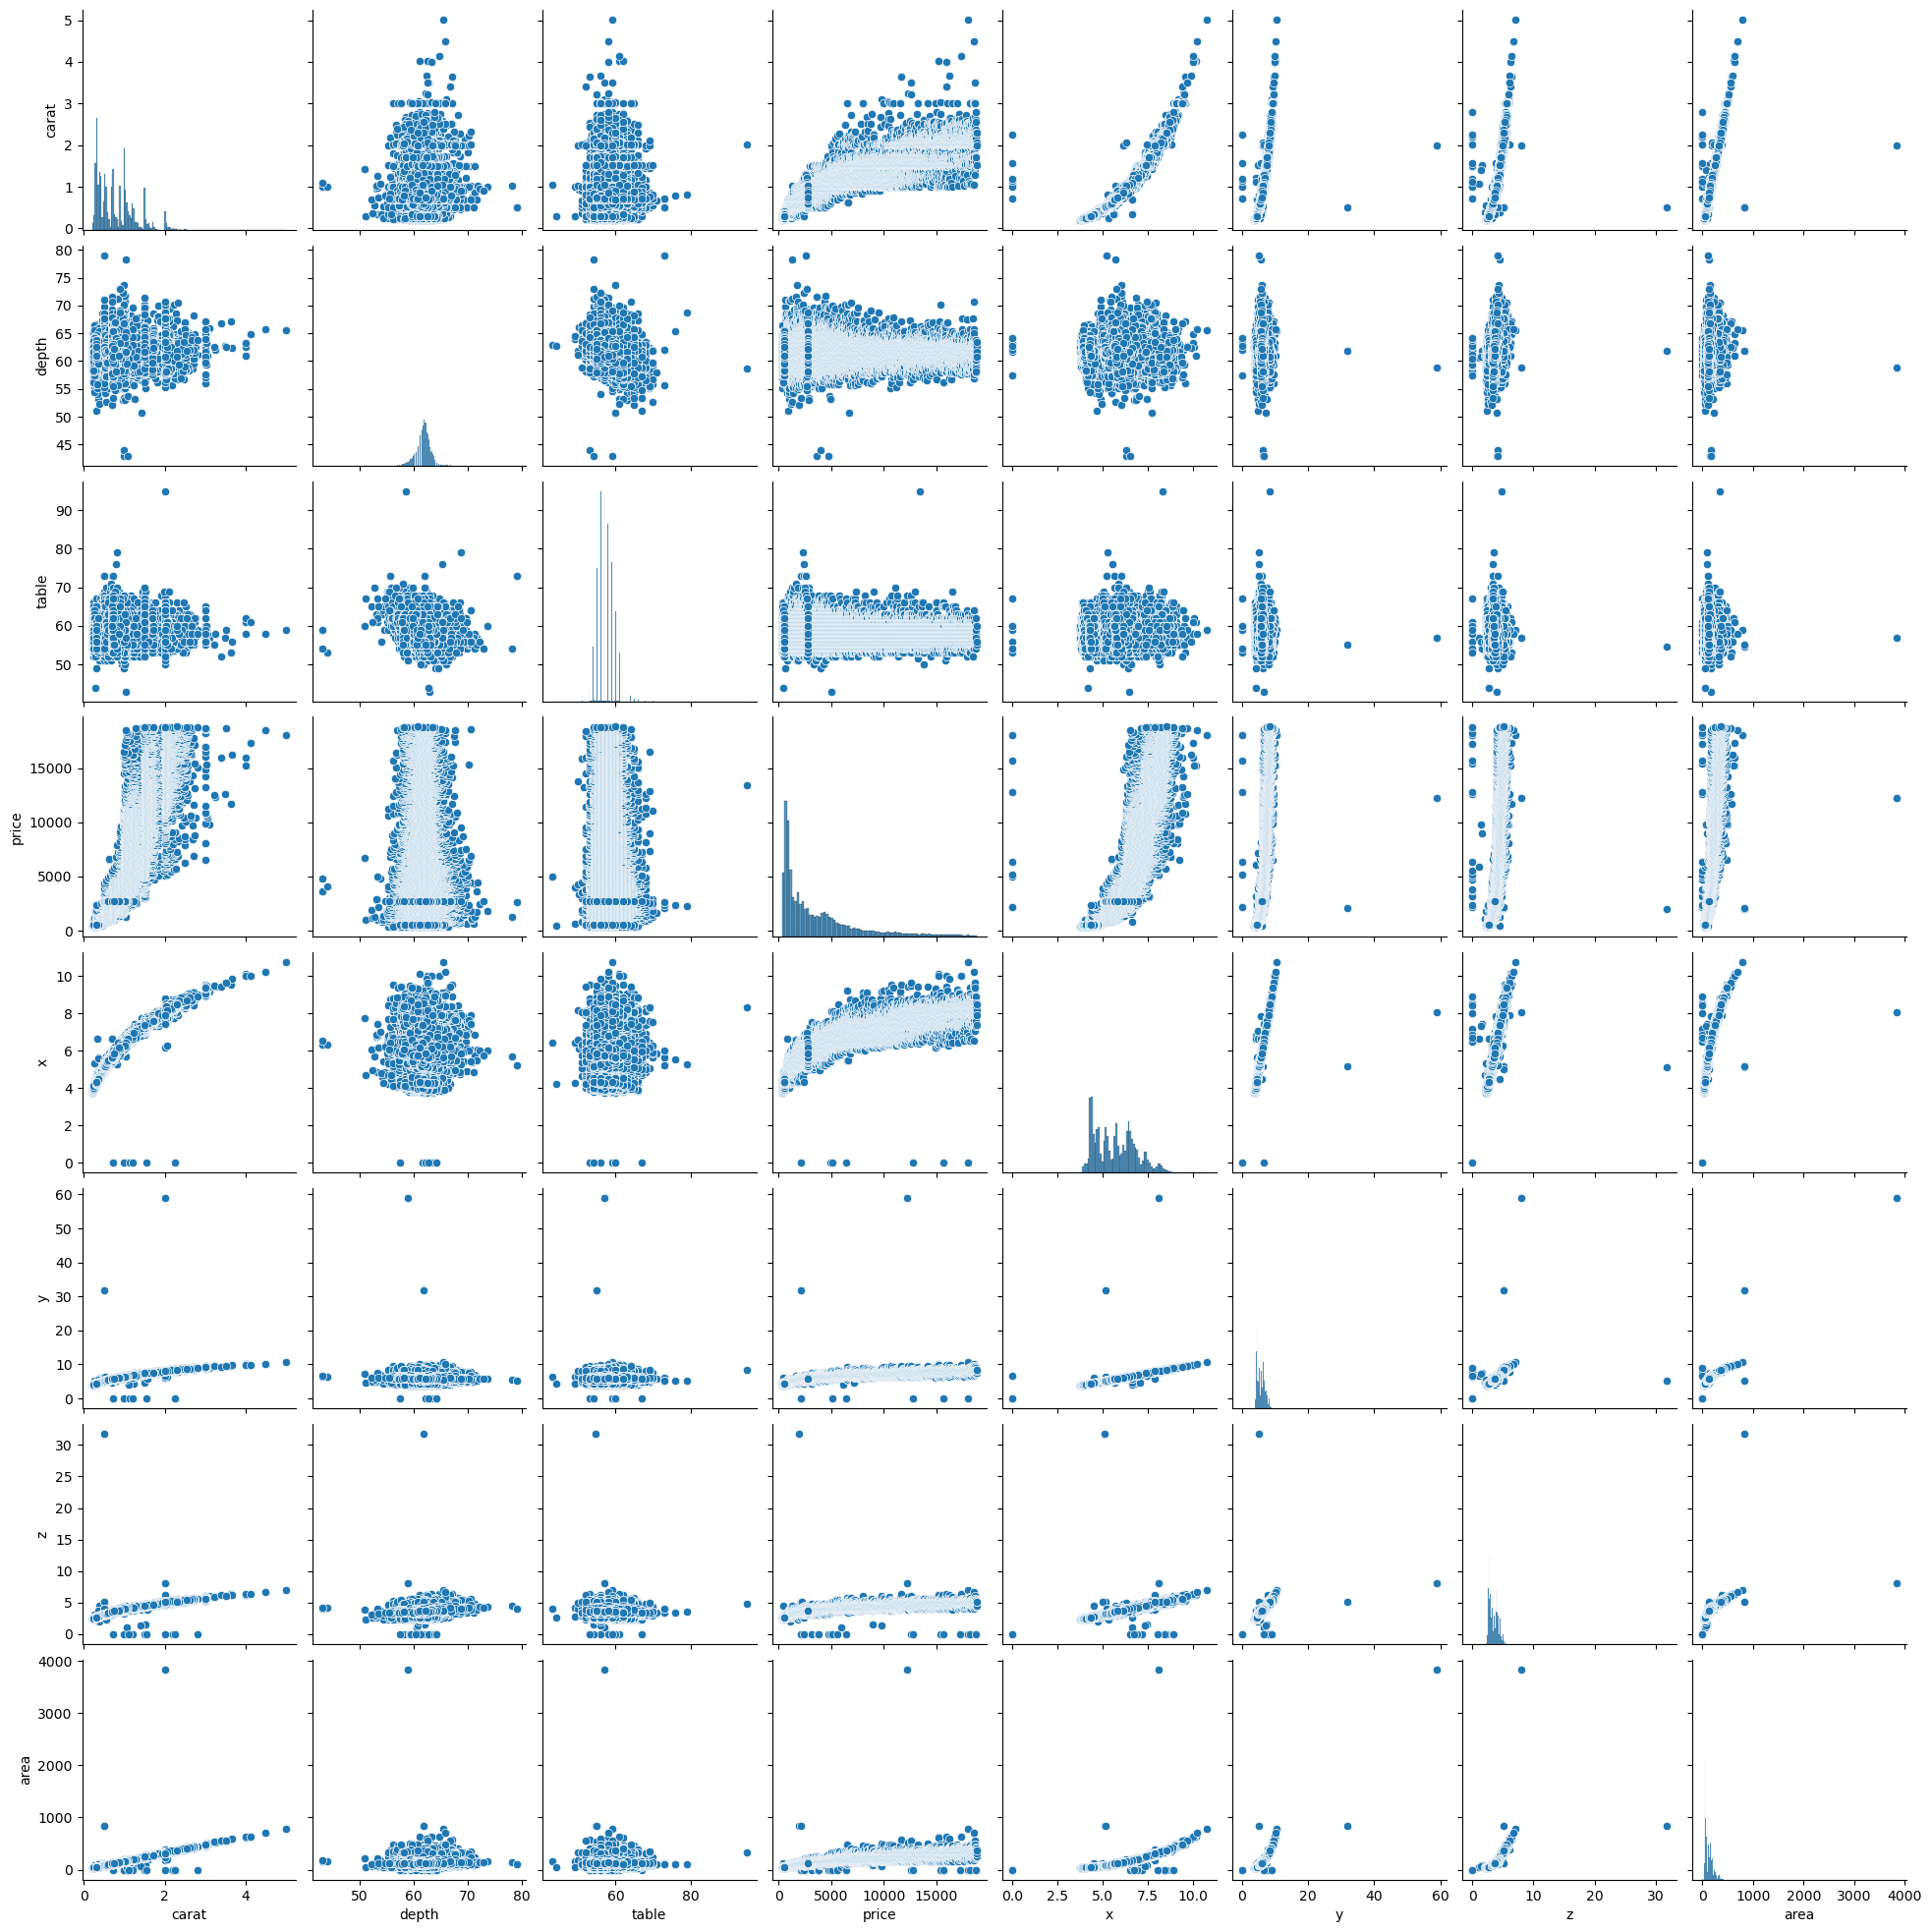

In [21]:
sns.pairplot(df)

En la gráfica, se aprecia una relación lineal aparente entre el "área" y el "carat," así como entre el "precio" y el "área." Aunque la relación entre el "precio" y el "carat" podría considerarse lineal en su mayoría, se observan algunos puntos que están ligeramente fuera del rango lineal. Para explorar esta relación, vamos a crear un modelo de regresión lineal simple con la siguiente forma: $price=carat+are$.

b. (10%) Realice un modelo de regresión lineal múltiple para el precio de cada diamante teniendo en cuenta la longitud, el ancho y la profundidad de los diamantes, ponga su ecuación y estime los valores de los diamantes para los siguientes tamaños:
|<center>X</center>|<center>Y</center>|<center>Z</center>|
|-----------|-----------|-----------|
|3.10|<center>3.17</center>| 3.43|
|4.14|<center>3.25</center>|3.11|
|4.00|<center>4.45</center>|3.14|
|4.22|<center>4.14</center>|4.15|
|4.14|<center>2.35</center>|2.85|
|2.94|<center>4.96</center>|4.12|
|4.95|<center>5.10</center>|3.47|
|4.17|<center>4.01</center>|5.13|
|2.77|<center>3.65</center>|5.17|
|4.15|<center>3.05</center>|3.18|
|4.16|<center>3.15</center>|4.17|
|3.90|<center>4.12</center>|3.16|

¿Qué puede concluir de los resultados obtenidos?

In [207]:
# Implementa tu respuesta en esta celda
model=sm.OLS.from_formula('price~x+y+z',data=df).fit()
print(model.summary())

model.params



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 6.470e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:13:09   Log-Likelihood:            -4.8263e+05
No. Observations:               53940   AIC:                         9.653e+05
Df Residuals:                   53936   BIC:                         9.653e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.411e+04     41.763   -337.936      0.0

Intercept   -14113.048598
x             2790.320883
y              218.787716
z              225.910421
dtype: float64

In [208]:
data_1 = {
    'x': [3.10, 4.14, 4.00, 4.22, 4.14, 2.94, 4.95, 4.17, 2.77, 4.15, 4.16, 3.90],
    'y': [3.17, 3.25, 4.45, 4.14, 2.35, 4.96, 5.10, 4.01, 3.65, 3.05, 3.15, 4.12],
    'z': [3.43, 3.11, 3.14, 4.15, 2.85, 4.12, 3.47, 5.13, 5.17, 3.18, 4.17, 3.16]
}

df_1 = pd.DataFrame(data_1, columns=['x', 'y', 'z'])

# Use the model to make predictions for 'price'
predicted_prices = model.predict(df_1)

# Print the predicted prices
print(predicted_prices)


0    -3994.624060
1    -1147.478660
2    -1268.801012
3     -494.585084
4    -1403.124313
5    -3893.567200
6     1598.766281
7     -441.151319
8    -4417.327716
9    -1147.519265
10    -874.085968
11   -1615.514838
dtype: float64


- Vemos que los parámetros del modelo tienen la siguiente ecuación. $Price=-14113+2790x+218y+225z$.
Sin embargo, al realizar predicciones para un conjunto de dimensiones, como (3.10, 3.17, 3.47), notamos que la ecuación produce valores negativos. Por ejemplo, para el primer caso, la predicción sería -3994. Esto indica que el modelo actual podría no ser apropiado para este conjunto de datos o que podría requerir ajustes para reflejar mejor la relación entre las variables. Ya que el valor de la intersección es -14113 el cual hace que varios valores en nuestros datos den negativo.

c. (10%) Realice un modelo de regresión lineal simple para el precio de cada diamante teniendo en cuenta los carates de los diamantes, ponga su ecuación. Responda las siguientes preguntas: <br>

- ¿Es cierta la hipótesis que afirma que la los carates no influyen en el valor de los diamantes?
- Hallé el coeficiente de correlación.
- ¿Qué puede decir de la homocedasticidad? Justifique y grafique. 



In [218]:
# Creamos ahor ael modelo solo con carates.
model_carates=sm.OLS.from_formula('price~carat',data=df).fit()
print(model_carates.summary())

correlation_price_carat=df['price'].corr(df['carat'])
print('Correlación entre precio y carat: ',correlation_price_carat)


## Creamos una función para grafica más rápido
def plot_model_residuals(model):
    residuos=model.resid
    plt.figure(figsize=(10, 5))
    sm.qqplot(residuos, line='45', fit=True, alpha=0.5, color='grey')
    plt.title('QQ Plot of Residuals')
    plt.show()
    fitted_values=model.fittedvalues

    fitted_values = model.fittedvalues
    plt.figure(figsize=(10, 5))
    plt.scatter(fitted_values, residuos, color='grey', s=20)
    plt.axhline(0, color='darkorange', lw=2)
    plt.title('Residuals vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:20:53   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.0

La hipótesis de que los quilates (carat) no influyen en el valor de los diamantes se puede refutar basándonos en el análisis del modelo de regresión. Al observar el resumen del modelo, notamos que el valor p (p-value) para la variable "carat" es 0.00. Esto significa que con un nivel de confianza del 95 por ciento, podemos afirmar que la hipótesis de que los quilates no influyen en el valor de los diamantes es falsa. En otras palabras, los quilates sí tienen un impacto significativo en el valor de los diamantes.


In [221]:
print('Correlación entre precio y carat: ',correlation_price_carat)


Correlación entre precio y carat:  0.9215913011934712


- Vemos que la correlación entre el precio y carat es de 0.92 

#### Homoscedasticidad

<Figure size 1000x500 with 0 Axes>

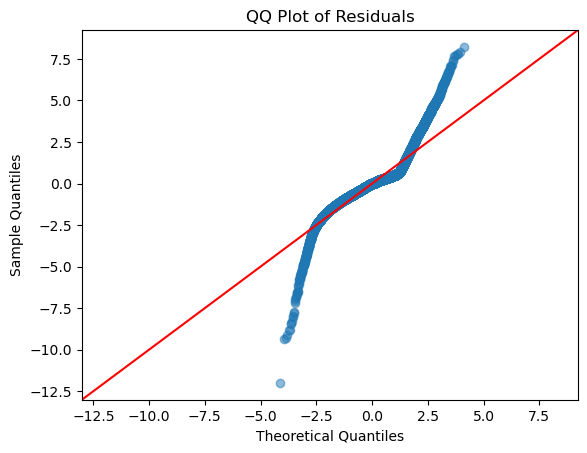

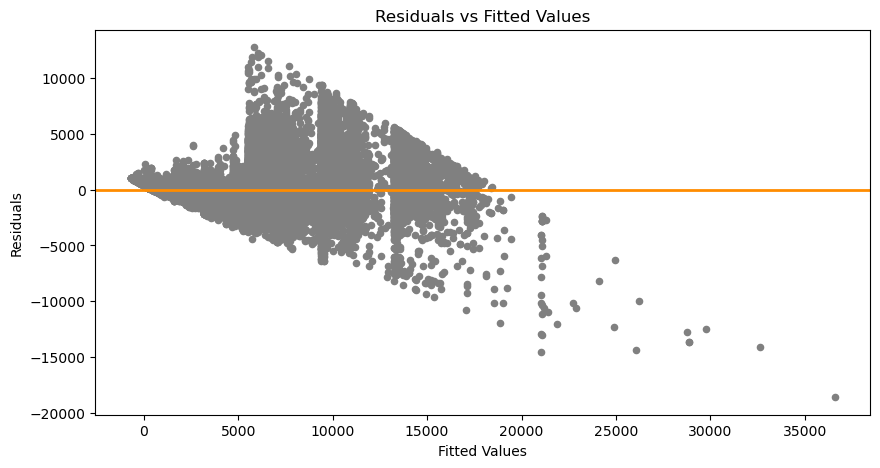

In [222]:
##Hacemos las gráficas de los residuos y la varianza
Graphs=plot_model_residuals(model_carates)


Lo que podemos observar en esta gráfica es que los valores de los cuantiles teóricos y los errores no siguen una distribución normal. Esto sugiere que el supuesto de que los errores de esta regresión lineal siguen una distribución normal no se cumple adecuadamente.

En la gráfica, es evidente que los residuos no exhiben una varianza constante; en cambio, se observan picos fluctuantes hacia arriba y hacia abajo, lo que indica una varianza que cambia a lo largo de los valores ajustados. Para esto vamos a hacer pruebas más formales para afirmar esto.

Ahora vamos a hacer la prueba de Brausch-Pagan para ver si nuestros datos presentan homoscedasticidad

In [223]:
## Prueba formal de Homoscedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan

residuals=model_carates.resid
exog_vars=model.model.exog
bp_test = het_breuschpagan(residuals, exog_vars)

# bp_test will contain several statistics, including the p-values
lm_p_value = bp_test[0]
f_p_value = bp_test[3]

print(f"LM Statistic p-value: {lm_p_value}")
print(f"F-Statistic p-value: {f_p_value}")



LM Statistic p-value: 7488.701211590204
F-Statistic p-value: 0.0


Con un p-valor muy bajo, puedo concluir que mis datos presentan heterocedasticidad con un nivel de significancia del 5%, (luego quisieramos ver alguna forma de encontrar una transformación lineal que pueda ayudarnos a mejorar y hacer que se cumpla la homoscedasticidad.)


## Ejercicio 2

(30%) Teniendo en cuenta la base de datos contenida en taxis.cvs, donde se muestran los datos de 6433 carreras de taxis, con su fecha de recogida, de bajada de los pasajeros, el número de pasajeros, las distancias, las tarifas, las propinas, el método de pago, la zona de recogida y de bajada.  <br>

a. (15%) Realice un modelo de regresión lineal simple para el precio de cada carrera teniendo en cuenta el tiempo que esta se demoró en minutos, ponga su ecuación. Responda las siguientes preguntas:
- ¿Es cierta la hipótesis que afirma que el tiempo no influye en el valor de la carrera?
- Hallé el coeficiente de correlación.
- ¿Qué puede decir de la homocedasticidad? Justifique y grafique.


In [114]:
# Implementa tu respuesta en esta celda
taxis=pd.read_csv('Archivos/taxis.csv')
taxis['pickup']=pd.to_datetime(taxis['pickup'])
taxis['dropoff']=pd.to_datetime(taxis['dropoff'])
taxis['time_minutes'] = (taxis['dropoff'] - taxis['pickup']).dt.total_seconds() / 60



- Lo primero que hacemos para esta base de datos es: creamos la columna time_minutes la cual toma la hora de llegada menos la hora de partidad y calcula el tiempo en minutos. Con esta variable vamos a crear el módelo de regresión.


Luego creamos un modelo de regresión lineal simple al cual nos va a dar la ecuación $total=b+tiempominx$


In [225]:
# Implementa tu respuesta en esta celda
modelo_taxis=sm.OLS.from_formula('total~time_minutes',data=taxis).fit()
print(modelo_taxis.summary())



                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                 1.308e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:40:53   Log-Likelihood:                -22449.
No. Observations:                6433   AIC:                         4.490e+04
Df Residuals:                    6431   BIC:                         4.492e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.5771      0.157     29.161   

- Con un nivel de confianza del 95%, podemos concluir que la variable "tiempo" influye en la variable "total" o el valor total de la carrera. Esto se basa en el hecho de que observamos un valor de p muy bajo en la variable "time_minutes" con respecto a "total." Este valor de p pequeño nos indica que la hipótesis nula, que establece que la variable no tiene efecto (valor igual a 0), es falsa. Por lo tanto, podemos afirmar que el tiempo tiene un impacto significativo en el valor total de la carrera.

In [226]:
# Implementa tu respuesta en esta celda

corr_t_p=taxis['total'].corr(taxis['time_minutes'])
print(corr_t_p)



0.8187912054602108


La correlación de las dos variables es 0.81

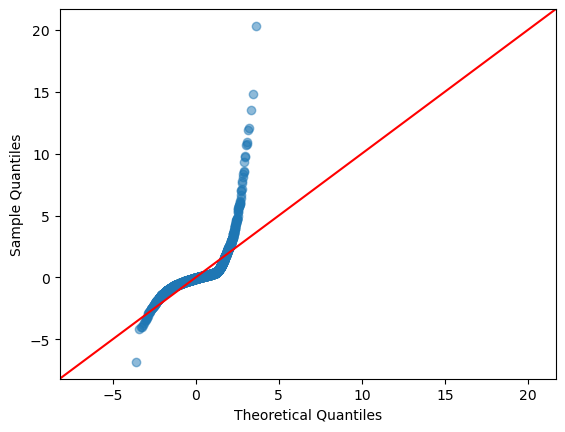

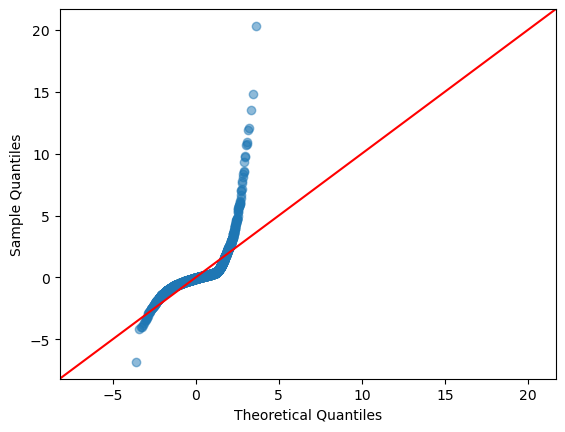

In [227]:
sm.qqplot(modelo_taxis.resid,line='45',fit=True,alpha=0.5)

Nuestros errores no siguen una distribución normal, como vemos el qq plot que nos da la grafica de quantil sobre cuantil de una normal centrada en 0 y con varianza 1 la linea recta no se ajusta a una y por lo tanto hay muchos quantiles distintos a una distribución normal

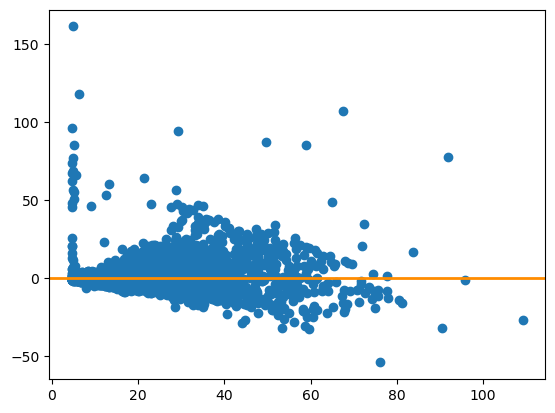

In [228]:
modelo_taxis.fittedvalues
plt.scatter(modelo_taxis.fittedvalues,modelo_taxis.resid)
plt.axhline(0, color='darkorange', lw=2)


Vemos valores grandes en la parte izquierda de la gráfica, y una varianza que en general parece centrada en 0, pero paece que no cumple con la varianza constante. Para esto vamos a hacer una pruena más formal como lo es la prueba de Breush-Pagan

In [229]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(modelo_taxis.resid, modelo_taxis.model.exog)
print(f"Breusch-Pagan test :\nLM Statistic: {bp_test[0]}\nLM-Test p-value: {bp_test[1]}\nF-Statistic: {bp_test[2]}\nF-Test p-value: {bp_test[3]}\n")


Breusch-Pagan test :
LM Statistic: 102.16961652019543
LM-Test p-value: 5.096563445816914e-24
F-Statistic: 103.78619612933349
F-Test p-value: 3.437782500052652e-24



El hecho de que el valor p sea nuevamente muy pequeño indica que nuestros datos siguen siendo heterocedásticos. En otras palabras, la hipótesis de homoscedasticidad es rechazada debido al valor de p significativamente bajo, lo que sugiere que nuestros datos aún muestran heteroscedasticidad.

b. (15%) Realice un modelo de regresión lineal simple para el precio de cada carrera teniendo en cuenta la distancia, ponga su ecuación. Responda las siguientes preguntas:
- ¿Es cierta la hipótesis que afirma que la distancia influye en el valor de la carrera?
- Hallé el coeficiente de correlación.
- ¿Qué puede decir de la homocedasticidad? Justifique y grafique.


In [230]:
# Implementa tu respuesta en esta celda

model_distancia=sm.OLS.from_formula('total~distance',data=taxis).fit()

print(model_distancia.summary())


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 2.899e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:44:28   Log-Likelihood:                -20531.
No. Observations:                6433   AIC:                         4.107e+04
Df Residuals:                    6431   BIC:                         4.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6419      0.094     92.374      0.0

- Si, con un nivel de confianza del 95 prociento podemos afirmar que por el valor p de 0.00 la vaiable distancia es diferente de 0, por lo tanto la hipotesis es verdadera. La distancia influye en el precio.

In [231]:
# Implementa tu respuesta en esta celda
corr_dis_t=taxis['total'].corr(taxis['distance'])
print(corr_dis_t)


0.904676419220121


Valor de la correlación entre esas dos variables (total,distance)que es: 0.90

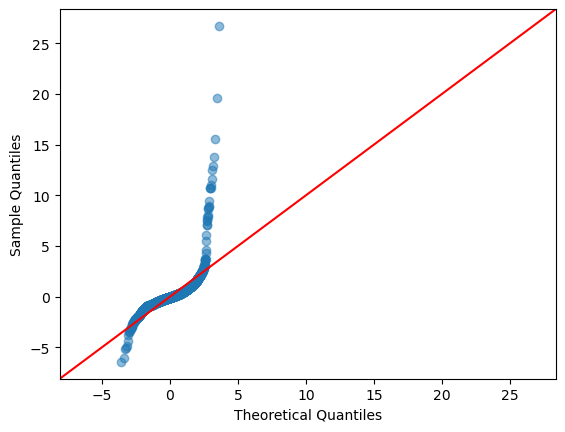

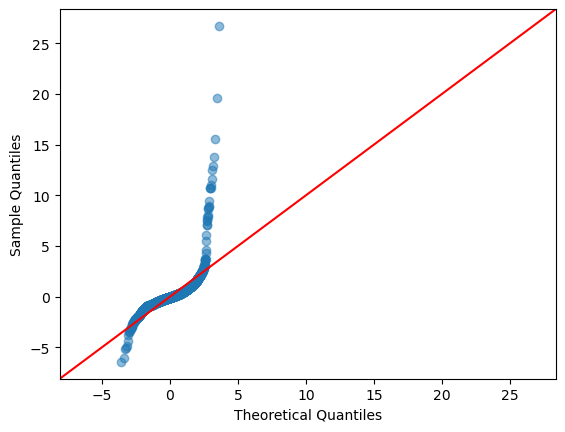

In [232]:
sm.qqplot(model_distancia.resid,line='45',fit=True,alpha=0.5)

Los valores tampoco se distribuyen de manera normal, para decir esto mucho más formalmente podemos hacer una prueba de Kosmorov.

### Homocsedasticidad

Breusch-Pagan test :
LM Statistic: 19.549165086773428
LM-Test p-value: 9.804357625689567e-06
F-Statistic: 19.602657587807162
F-Test p-value: 9.691310194414679e-06



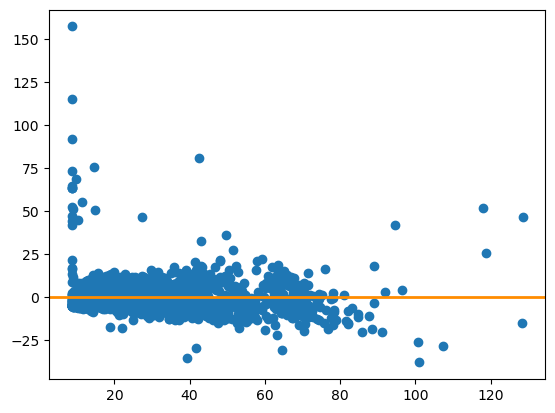

In [233]:
plt.scatter(model_distancia.fittedvalues,model_distancia.resid)
#Plot a line in 0
plt.axhline(0, color='darkorange', lw=2)

bp_test = het_breuschpagan(model_distancia.resid, model_distancia.model.exog)
print(f"Breusch-Pagan test :\nLM Statistic: {bp_test[0]}\nLM-Test p-value: {bp_test[1]}\nF-Statistic: {bp_test[2]}\nF-Test p-value: {bp_test[3]}\n")




Vemos que al 95 porciento de confianza la varianza cumple con la propiedad de heteroscedasticidad.

## Ejercicio 3

(35%) De acuerdo con la base de datos de Boston.cvs, en la cual se muestran el valor promedio de 506 predios en $1000’s y las siguientes variables:

|<center>Index</center>|<center>Meaning</center>|
|-----------|-----------|
|<center> 1. CRIM|<center>per capita crime rate by town</center>|
|<center> 2. ZN|<center>proportion of residential land zoned for lots over 25,000 sq.ft.</center>|
|<center> 3. INDUS|<center>proportion of non-retail business acres per town</center>|
|<center> 4. CHAS|<center>Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</center>|
|<center> 5. NOX|<center>nitric oxides concentration (parts per 10 million)</center>|
|<center> 6. RM|<center>average number of rooms per dwelling</center>|
|<center> 7. AGE|<center>proportion of owner-occupied units built prior to 1940</center>|
|<center> 8. DIS|<center>weighted distances to five Boston employment centres</center>|
|<center> 9. RAD|<center>index of accessibility to radial highways</center>|
|<center> 10. TAX|<center>full-value property-tax rate per 10,000</center>|
| 11. PTRATIO|<center>pupil-teacher ratio by town</center>|
|<center> 12. B|<center>1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</center>|
|<center> 13. LSTAT|<center>% lower status of the population</center>|
|<center> 14. MEDV|<center>Median value of owner-occupied homes in $1000's</center>|

b. (10%)  Determine las caracteristicas mas influyentes en el precio de las viviendas de Boston. Realice los analisis que considere relevantes como analisis de correlación o graficas de donde se interpreten los resultados.

In [234]:
# Implementa tu respuesta en esta celda
boston=pd.read_csv('Archivos/dataset_boston.csv',sep=';') ##Leemos los datos de boston.
boston['MDEV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MDEV, Length: 506, dtype: float64

Lo primero que queremos hacer es ver que significan nuestras variables, para esto vamos a hacer una tabla de descripciones de nuestras variables.

In [157]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


En este contexto, nuestra atención se centra en la variable "MDEV" que nos proporciona información sobre el valor de las viviendas en Boston. Este valor se expresa en miles de dólares (1000s). Por ejemplo, si tenemos un valor de 20 en "MDEV," significa que el valor de la vivienda es de $20,000. El valor promedio de las viviendas en este conjunto de datos es de $20,000, con un valor máximo de $50,000. Notablemente, la media y la mediana están muy cerca en valor, lo que sugiere que los datos están agrupados y muestran una simetría notable en relación a la media. En general, la distribución de los valores parece seguir una forma de campana, lo que es característico de una distribución normal.

Vamos a hacer un histograma de esta variable

(array([ 4.,  7., 10., 13., 12., 30., 28., 22., 32., 52., 51., 51., 50.,
        23., 11., 16., 14., 11., 15.,  6.,  9.,  6.,  1.,  1.,  3.,  4.,
         3.,  2.,  1., 18.]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ,
        21.5, 23. , 24.5, 26. , 27.5, 29. , 30.5, 32. , 33.5, 35. , 36.5,
        38. , 39.5, 41. , 42.5, 44. , 45.5, 47. , 48.5, 50. ]),
 <BarContainer object of 30 artists>)

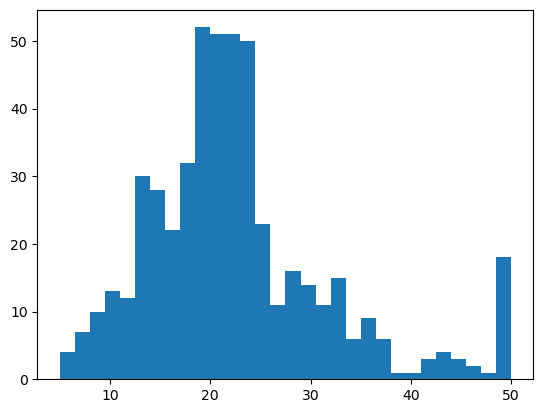

In [236]:
plt.hist(boston['MDEV'],bins=30)

Observamos que nuestra variable tiene una distribución que se asemeja a una distribución normal, aunque con una cola más larga en el lado derecho. Nuestro interés principal es identificar qué otras variables están altamente correlacionadas con esta variable para evaluar la posibilidad de realizar una regresión lineal. Si quisieramos hacer un fit con una distribución me parece que puede acercarse más a una Gamma.

## Veamos de que tipo son nuestras variables.

In [237]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MDEV       float64
dtype: object

### Correlaciones

<Axes: >

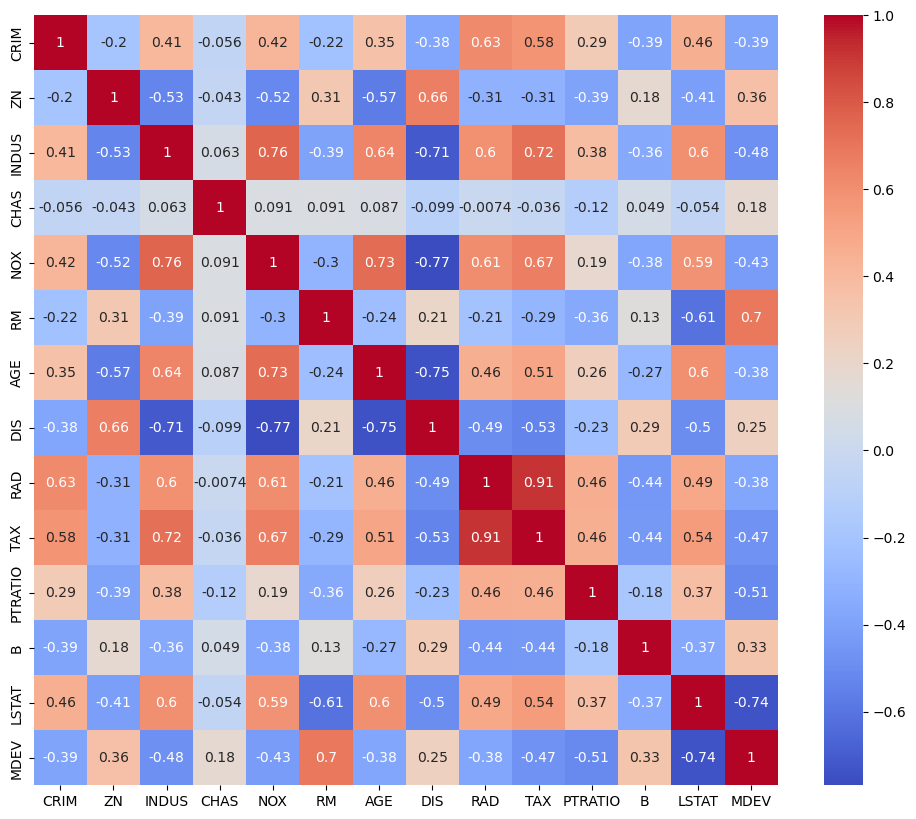

In [238]:
correlation_matriz=boston.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matriz, annot=True,cmap='coolwarm')

- Queremos ahora ver Medv con cuales tiene una correlacion mas fuerte

a. (25%) Con el conjunto de datos suministrado de Boston, realizen un modelo de regresion múltiple que prediga el precio medio de las viviendas en diferentes áreas en función de diversas características. Si considera necesario experimentar con diferentes configuraciones adelante.

In [239]:
# Modelo 1
model_boston=sm.OLS.from_formula('MDEV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=boston).fit()
print(model_boston.summary())


                            OLS Regression Results                            
Dep. Variable:                   MDEV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          6.72e-135
Time:                        17:53:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

Observamos en el gráfico que los valores p de las variables "Indus" y "Age" son un poco elevados. Esto sugiere que la hipótesis nula, que establece que los coeficientes de esas variables son igual a cero, es plausible. Para evaluar el impacto de estas variables en nuestro modelo, vamos a crear un modelo sin tener en cuenta "Indus" y "Age" para ver si mejora el rendimiento del modelo.


#### Modelo 2

                            OLS Regression Results                            
Dep. Variable:                   MDEV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          5.54e-137
Time:                        17:54:29   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

Text(0.5, 1.0, 'QQ Plot de los residuos de la regresión de precio contra carat')

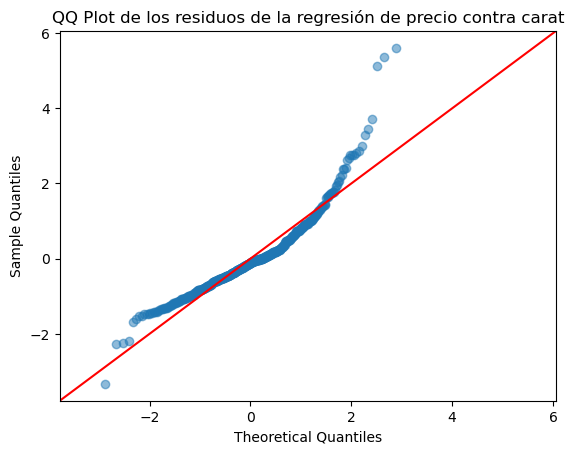

In [240]:
model_boston1=sm.OLS.from_formula('MDEV~CRIM+ZN+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=boston).fit()
print(model_boston1.summary())

sm.qqplot(model_boston1.resid,line='45',fit=True,alpha=0.5)
plt.title('QQ Plot de los residuos de la regresión de precio contra carat')



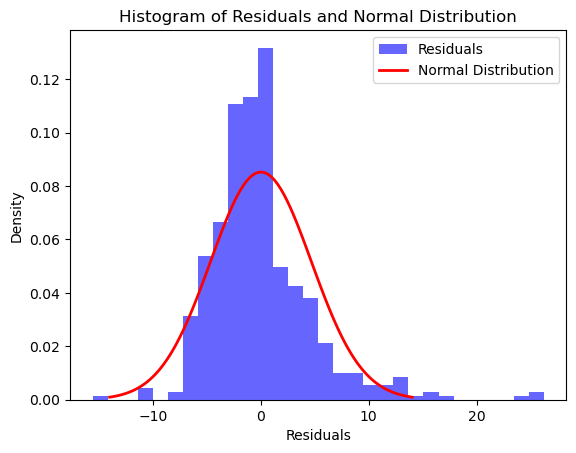

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Get the residuals from the model
residuals = model_boston1.resid

# Create a histogram of the residuals
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='b', label='Residuals')

# Calculate mean and standard deviation of residuals
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Create a normal distribution with the same mean and standard deviation
x = np.linspace(mean_residuals - 3*std_residuals, mean_residuals + 3*std_residuals, 100)
pdf = stats.norm.pdf(x, mean_residuals, std_residuals)

# Plot the normal distribution
plt.plot(x, pdf, 'r', lw=2, label='Normal Distribution')

plt.title('Histogram of Residuals and Normal Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()


Queremos ver si el supuesto de normalidad se cumple para esta regresión. Como vemos en la gráfica, se parece un poco a una normal, sin embargo hay colas más pesadas hacia la derecha. Vamos a hacer test más formales para saber si se distribuyen normal o no.

#### Prueba de Kosmovorov

In [242]:
from scipy.stats import kstest, norm

# Obtener los residuos del modelo
residuals = model_boston1.resid

# Realizar la prueba de Kolmogorov-Smirnov
kstest_statistic, kstest_p_value = kstest(residuals, cdf='norm')

if kstest_p_value > 0.05:
    print("Los residuos se ajustan a una distribución normal (p-value =", kstest_p_value, ")")
else:
    print("Los residuos no se ajustan a una distribución normal (p-value =", kstest_p_value, ")")


Los residuos no se ajustan a una distribución normal (p-value = 3.828509755725903e-50 )


#### Prueba Shapiro

In [243]:
from scipy.stats import shapiro

# Obtener los residuos del modelo
residuals = model_boston1.resid

# Realizar la prueba de Shapiro-Wilk
shapiro_statistic, shapiro_p_value = shapiro(residuals)

if shapiro_p_value > 0.05:
    print("Los residuos se ajustan a una distribución normal (p-value =", shapiro_p_value, ")")
else:
    print("Los residuos no se ajustan a una distribución normal (p-value =", shapiro_p_value, ")")

Los residuos no se ajustan a una distribución normal (p-value = 1.457611518762765e-17 )


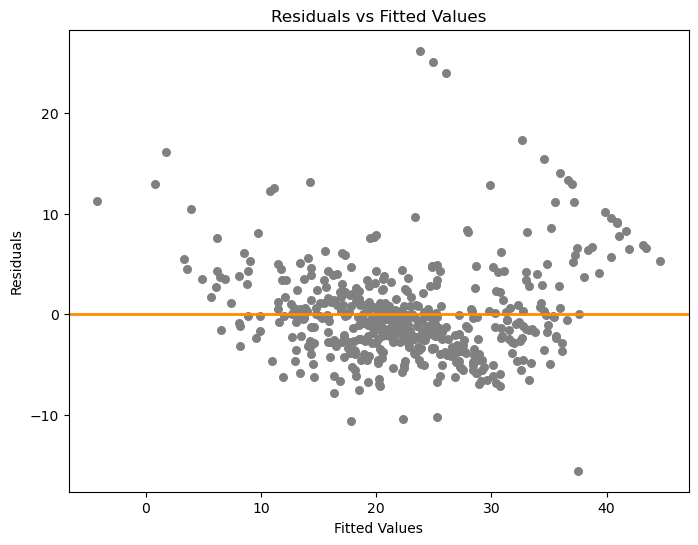

Breusch-Pagan test :
LM Statistic: 59.907284353819946
LM-Test p-value: 9.6471874090662e-09
F-Statistic: 6.030992178980892
F-Test p-value: 2.7767516056906176e-09



In [244]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already fitted 'model_boston1'
residuals = model_boston1.resid

# Create a scatter plot of residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model_boston1.fittedvalues, residuals, color='grey', s=30)
plt.axhline(0, color='darkorange', lw=2)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


bp_test2 = het_breuschpagan(model_boston1.resid, model_boston1.model.exog)
print(f"Breusch-Pagan test :\nLM Statistic: {bp_test2[0]}\nLM-Test p-value: {bp_test2[1]}\nF-Statistic: {bp_test2[2]}\nF-Test p-value: {bp_test2[3]}\n")




- Vemos que nuestros datos presentan Heteroscedasticidad

#### Modelo 3 Queremos un Módelo que pase el test de normalidad y homoscedasticidad

                            OLS Regression Results                            
Dep. Variable:                   MDEV   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     151.1
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          7.96e-128
Time:                        18:05:33   Log-Likelihood:                -1528.3
No. Observations:                 506   AIC:                             3075.
Df Residuals:                     497   BIC:                             3113.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.5880      4.857      7.532      0.0

c:\Users\David\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 1000x500 with 0 Axes>

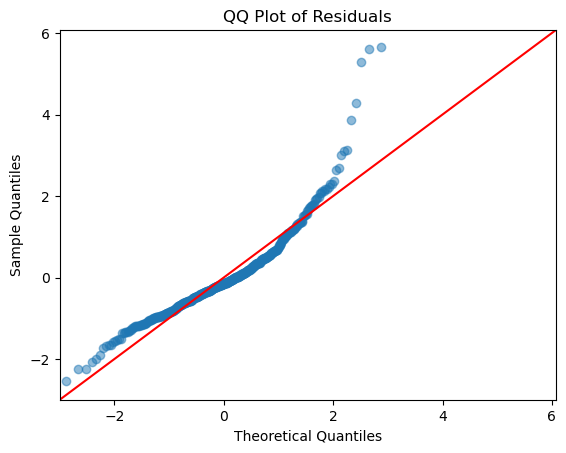

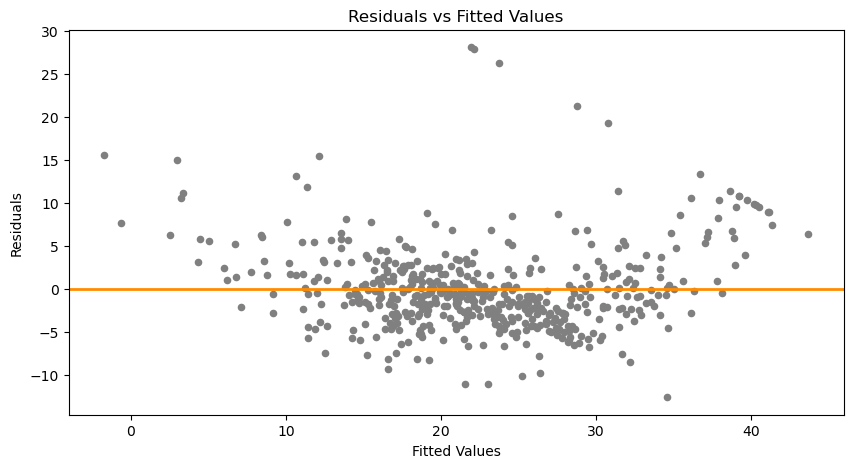

In [249]:
# Modelo 1
model_bosto2=sm.OLS.from_formula('MDEV~LSTAT+INDUS+NOX+PTRATIO+RM+TAX+DIS+AGE',data=boston).fit()
print(model_bosto2.summary())

plot_model_residuals(model_bosto2)


Para esto vamos a hacer una transformación estabilizadora de varianza 

                            OLS Regression Results                            
Dep. Variable:           np.log(MDEV)   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          2.50e-141
Time:                        18:19:10   Log-Likelihood:                 78.957
No. Observations:                 506   AIC:                            -139.9
Df Residuals:                     497   BIC:                            -101.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1188      0.203     20.316      0.0

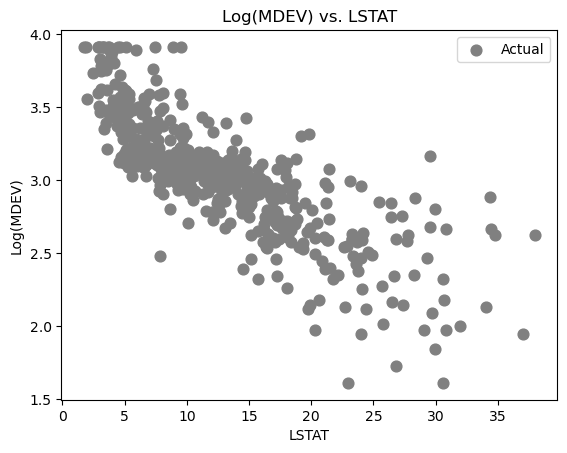

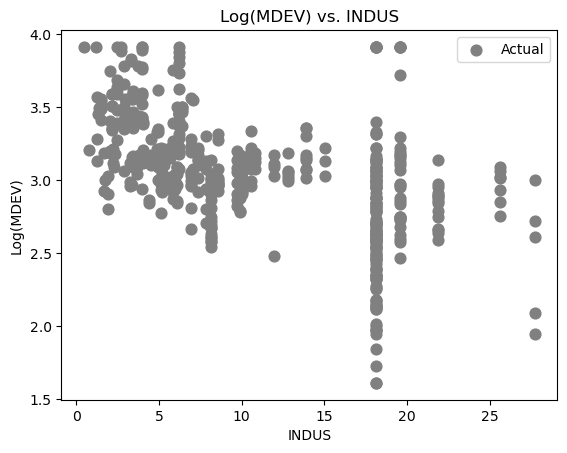

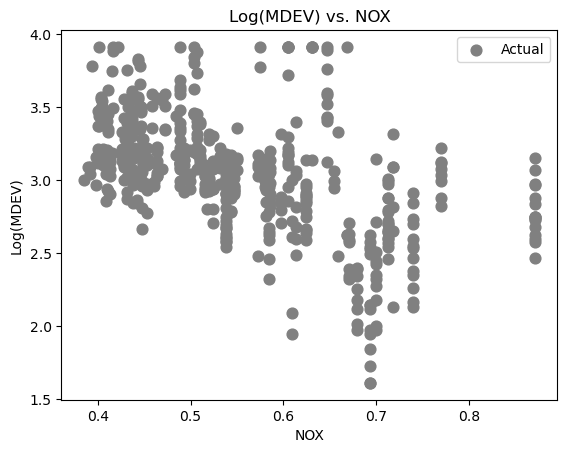

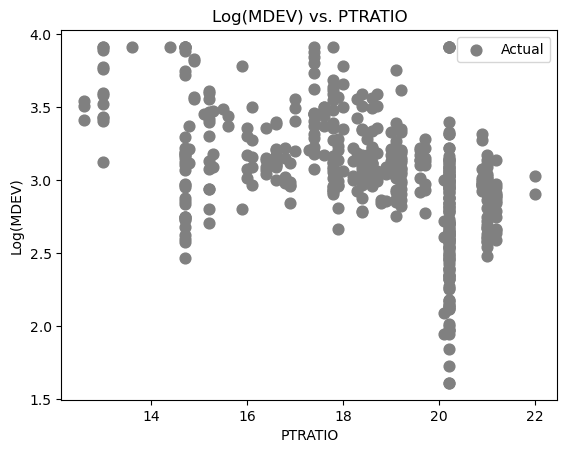

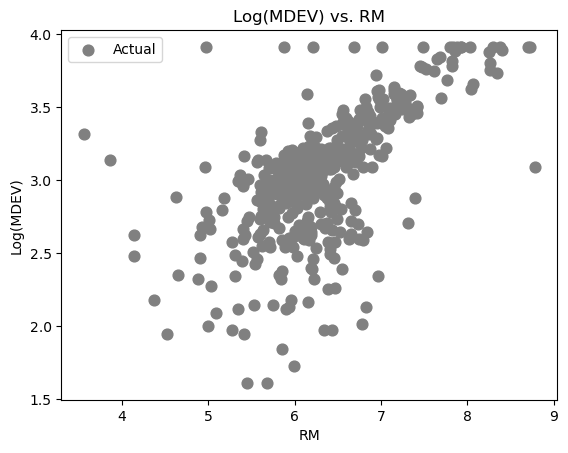

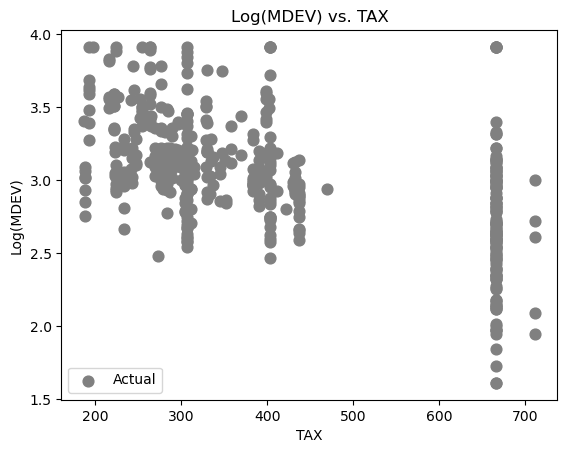

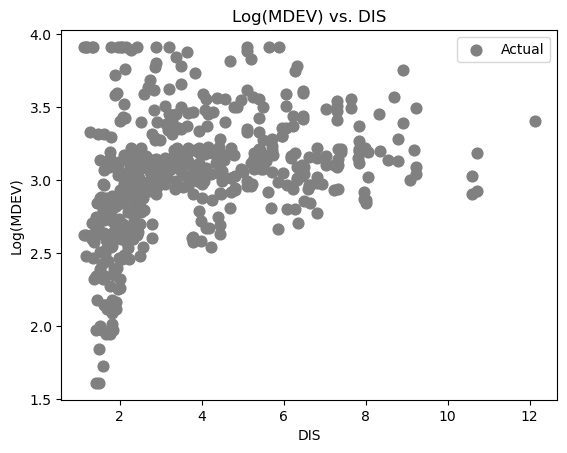

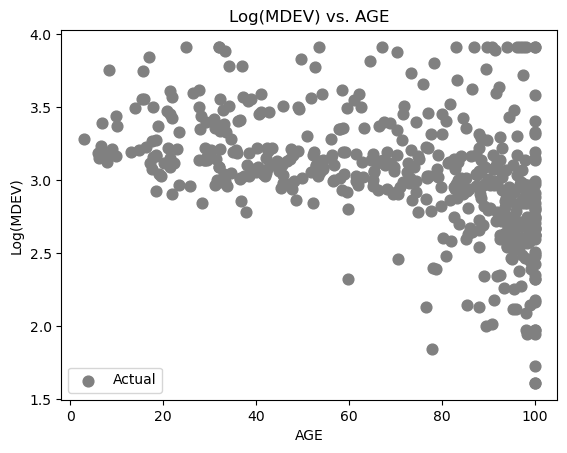

In [261]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit the linear regression model with log-transformed 'MDEV'
model_bosto3 = sm.OLS.from_formula('np.log(MDEV)~LSTAT+INDUS+NOX+PTRATIO+RM+TAX+DIS+AGE', data=boston).fit()

# Display the model summary
print(model_bosto3.summary())

# Create individual scatter plots for each predictor variable
predictor_variables = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

for variable in predictor_variables:
    plt.figure()
    plt.scatter(boston[variable], np.log(boston['MDEV']), color='grey', s=60, label='Actual')
    plt.title(f'Log(MDEV) vs. {variable}')
    plt.xlabel(variable)
    plt.ylabel('Log(MDEV)')
    plt.legend()

plt.show()



Hacemos el plot para todas las ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'] y vemos que parece tener una relación de raiz cuadrada. Hacemos la transformación y calculamos el tercer modelo.

                            OLS Regression Results                            
Dep. Variable:           np.log(MDEV)   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     173.1
Date:                Wed, 25 Oct 2023   Prob (F-statistic):          1.41e-161
Time:                        18:20:45   Log-Likelihood:                 134.90
No. Observations:                 506   AIC:                            -245.8
Df Residuals:                     494   BIC:                            -195.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4634      0.221     20.228   

c:\Users\David\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 1000x500 with 0 Axes>

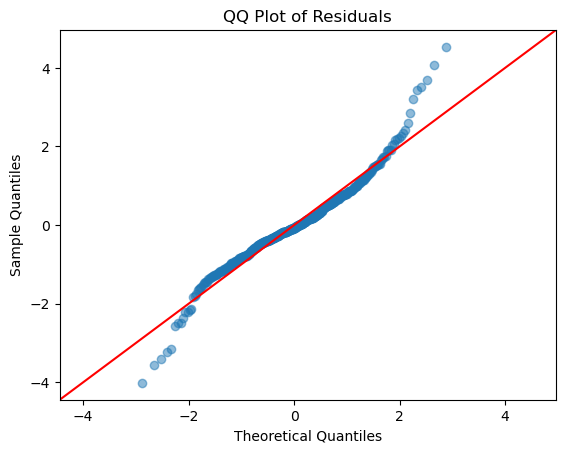

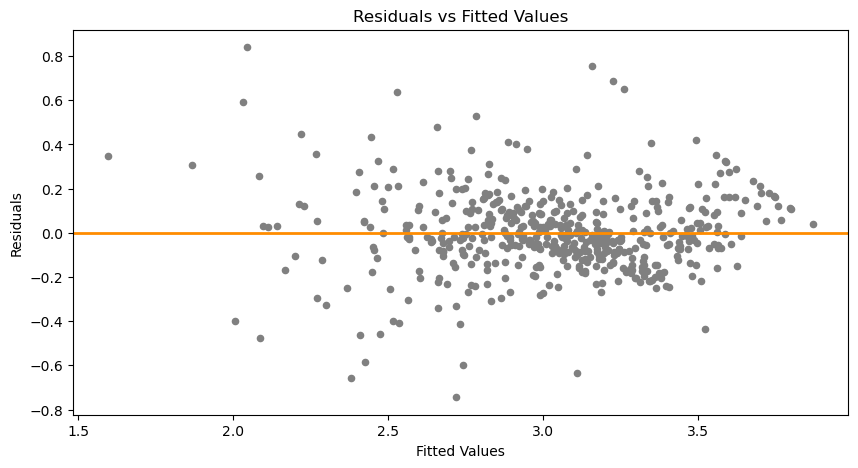

In [262]:
model_bosto3 = sm.OLS.from_formula('np.log(MDEV)~CRIM+ZN+CHAS+NOX+RM+np.sqrt(DIS)+RAD+TAX+PTRATIO+B+LSTAT', data=boston).fit()


# Display the model summary
print(model_bosto3.summary())

plot_model_residuals(model_bosto3)

Observamos que nuestro coeficiente de determinación (R²) aumenta a 0.79, lo que significa que el 79% de la variabilidad en nuestros datos puede ser explicada por el modelo. Al examinar el gráfico de Q-Q (Quantile-Quantile), notamos una mejora significativa en comparación con nuestros modelos anteriores. Esta mejora es especialmente evidente en la constancia de las observaciones en el gráfico Q-Q. Sin embargo, debemos tener en cuenta que hemos alcanzado el máximo potencial con estos datos, lo que sugiere que hemos optimizado nuestro modelo en la medida en que los datos disponibles lo permiten.


## Créditos

__Autores__: Laura Valentina Diaz Pinzon

__Actualizado por__: Alejandra Tabares Pozos. 

__Fecha última actualización__: 01/09/2023